In [3]:
import pandas as pd 
import numpy as np

In [4]:
file_path = '/home/kal/Documents/codeprojects/Unsupervised_Learning/data/cara.csv'
cars = pd.read_csv(file_path)
cars

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6


In [5]:
cars.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.866574,12279.756415,23363.630504,113.334539,57.906991,1.350827
std,2.050346,4741.382606,19472.114690,62.010438,10.125977,0.432371
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18243.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31064.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [6]:
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
cars[features].head()

,year,mileage,tax,mpg,engineSize
0,2017,15944,150,57.7,1.0
1,2018,9083,150,57.7,1.0
2,2017,12456,150,57.7,1.0
3,2019,10460,145,40.3,1.5
4,2019,1482,145,48.7,1.0


In [7]:
cars = cars.dropna(subset=features)
cars.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.866574,12279.756415,23363.630504,113.334539,57.906991,1.350827
std,2.050346,4741.382606,19472.114690,62.010438,10.125977,0.432371
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18243.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31064.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


1. Center and scale
2. Initialize centerion
3. Label 
4. Update centroids 
5. Repeat 3,4 undtil 

## Centering and Scaling

In [53]:
data = cars[features].copy()
data = ((data - data.min()) / (data.max() - data.min())) *9 + 1
data.describe()

,year,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,3.934362,2.183631,2.758639,2.845099,3.431488
std,0.288330,0.986524,0.962231,0.503502,0.778268
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.812500,1.505925,1.465517,2.566298,2.800000
50%,3.953125,1.924202,3.250000,2.894475,3.160000
75%,4.093750,2.573757,3.250000,3.232597,3.700000
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [54]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample().iloc[0]))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [55]:
centroids = random_centroids(data, 5)
centroids

,0,1,2,3,4
year,3.531250,3.671875,3.531250,3.953125,3.953125
mileage,3.072437,1.463418,2.918421,2.414877,2.434230
tax,1.000000,3.250000,3.250000,3.250000,3.250000
mpg,2.834807,2.775138,2.521547,1.507182,3.158011
engineSize,2.800000,4.600000,3.700000,2.800000,4.600000


In [56]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2 ).sum(axis=1)))
    return distances.idxmin(axis=1)

In [57]:
labels = get_labels(data, centroids)
labels.value_counts()

0    4482
2    4210
3    3944
1    3573
4    1756
Name: count, dtype: int64

In [60]:
def new_centroids(data, labels):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    

In [69]:
data.groupby(labels).apply(lambda x: x.mean())

,year,mileage,tax,mpg,engineSize
0,3.541835,3.846656,3.478833,2.544975,4.098710
1,3.619788,3.874204,1.230393,3.281897,3.531665
2,4.087320,1.698991,3.235386,2.917268,2.954996
3,4.016340,1.825804,3.337673,2.363143,4.372323
4,3.794463,2.167154,1.194466,3.174038,3.146374


In [70]:
data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean()))

,year,mileage,tax,mpg,engineSize
0,3.508235,3.722863,3.432080,2.508027,4.055209
1,3.612338,3.786700,1.213561,3.259596,3.483262
2,4.085073,1.641229,3.233837,2.894276,2.935916
3,4.010549,1.760954,3.318103,2.315717,4.325238
4,3.790529,2.118717,1.177708,3.159307,3.107271


In [61]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [62]:
def plot_cluster(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centrods_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration: {iteration}')
    plt.scatter(x=data_2d[:,0], y = data_2d[:,1], c=labels)
    plt.scatter(x=centrods_2d[:,0], y = centrods_2d[:,1])
    plt.show()


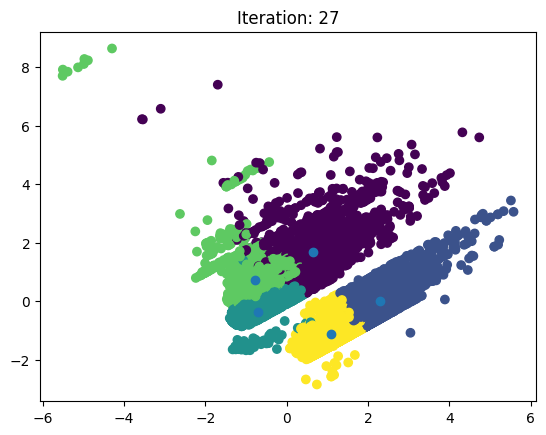

In [65]:
max_iteration = 100
k = 5

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iteration and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels)
    plot_cluster(data, labels, centroids, iteration)
    iteration += 1